In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


In [3]:
# Loading data
data = pd.read_csv("ObesityDataSet.csv")
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Editing data
data = data.replace({'Male': 1,'Female': 0,'yes': 1,'no': 0,'Always': 1,'Sometimes': 0.35,'Frequently': 0.7})

mtrans = ["Automobile", "Public_Transportation", "Motorbike", "Bike", "Walking"]

for i in mtrans:
    data[i] = 0
    data.loc[data["MTRANS"] == i, i] = 1
data.drop(columns=["MTRANS", "NObeyesdad"], inplace=True)




In [5]:
# converting data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [6]:
# 16D to 2D
pca = PCA(n_components=2,random_state = 1) 
data_pca1 = pca.fit_transform(data)

In [7]:
# clusters
km = KMeans(init="random", n_clusters=7)
predicted = km.fit_predict(data_pca1)

c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Katarina\anaconda3\envs\AIclasificator\Lib\site-packages\sklearn\cluster\_kmeans.py:1

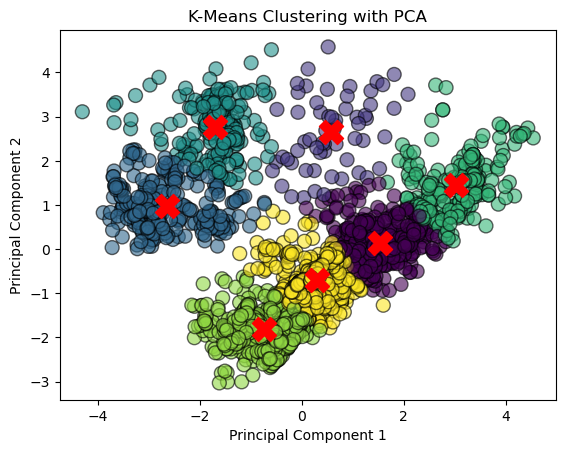

In [8]:
labels = km.labels_
cluster_centers = km.cluster_centers_

# Plot the data points with colors corresponding to their cluster labels
plt.scatter(data_pca1[:, 0], data_pca1[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6)

# Plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

In [9]:
# creating cluster column
data = pd.read_csv("ObesityDataSet.csv")

data['cluster'] = 0

for i in range(len(data['cluster'])):
    data['cluster'][i] = predicted[i]


C:\Users\Katarina\AppData\Local\Temp\ipykernel_4708\693076926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i] = predicted[i]
C:\Users\Katarina\AppData\Local\Temp\ipykernel_4708\693076926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i] = predicted[i]
C:\Users\Katarina\AppData\Local\Temp\ipykernel_4708\693076926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'][i] = predicte